In [29]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import scipy.optimize
from scipy.optimize import curve_fit,least_squares
from matplotlib import rcParams

rcParams['figure.dpi']=150

In [30]:
#cargo los datos obtenidos:


####################################################################################################
#Se toma para la incertidumbre de las medidas temporales el siguiente valor:
s_T = 0.2 #[s]
#Se toma para la incertidumbre del campo magnético el siguiente valor:
s_B = 4 #[mT] debido a variaciones en el contador
#Se toma para la incertidumbre de la intensidad el siguiente valor:
s_I = 0.01 #[A]
#Se toma para el radio el valor medio:
r = 50 #[mm]
#Defino un termino de masa:
m = 0.510999

####################################################################################################
#Radiación de fondo
data_fondo = np.loadtxt('rad_fondo.txt', comments='%')

N_f = data_fondo[0]################  Número de cuentas  ############################################


T_f = data_fondo[1]################        Tiempo[s]    ############################################



####################################################################################################


#Semicircunferencia derecha
data_cd = np.loadtxt('circ_d.txt', comments='%')

N_cd = data_cd[:,0]################  Número de cuentas  ############################################


T_cd = data_cd[:,1]################        Tiempo[s]    ############################################



####################################################################################################



#Semicircunferencia izquierda
data_ci = np.loadtxt('circ_i.txt', comments='%')

N_ci = data_ci[:,0]################  Número de cuentas  ############################################


T_ci = data_ci[:,1]################        Tiempo[s]       #########################################



####################################################################################################



#Circunferencia completa
data_cc = np.loadtxt('circ_c.txt', comments='%')

N_cc = data_cc[:,0]################  Número de cuentas         #####################################


T_cc = data_cc[:,1]################        Tiempo[s]           #####################################



####################################################################################################



#Medidas Krypton
data_Kr = np.loadtxt('krypton.txt', comments='%')

N_kr = data_Kr[:,1]################    Número de cuentas Kr    #####################################


t_kr = data_Kr[:,2]################        Tiempo[s]           #####################################

mB_kr = data_Kr[:,0]###############        Campo[mT]           #####################################

A_0_Kr = 167000####################   Actividad inicial [Bq]   #####################################

T_vm_Kr = 10.76####################   Periodo semides. [años]  #####################################

intervalo_Kr = 39.97################   tiempo desde fab. [años] #####################################
s_intervalo_Kr = 0.25##############   error t. fab fab. [años] #####################################


####################################################################################################



#Medidas Radio
data_Ra = np.loadtxt('radio.txt', comments='%')

N_ra = data_Ra[:,1]################    Número de cuentas Ra    #####################################


t_ra = data_Ra[:,2]################        Tiempo[s]           #####################################

mB_ra = data_Ra[:,0]###############        Campo[mT]           #####################################

A_0_Ra = 3330  ####################   Actividad inicial [Bq]   #####################################

T_vm_Ra = 1600 ####################   Periodo semides. [años]  #####################################

intervalo_Ra = 39.64###############   tiempo desde fab. [años] #####################################
s_intervalo_Ra = 0.25##############   error t. fab fab. [años] #####################################


####################################################################################################



#Medidas Sodio
data_Na = np.loadtxt('sodio.txt', comments='%')

N_na = data_Na[:,1]################    Número de cuentas Na    #####################################


t_na = data_Na[:,2]################        Tiempo[s]           #####################################

mB_na = data_Na[:,0]###############        Campo[mT]           #####################################

A_0_Na = 74000 ####################   Actividad inicial [Bq]   #####################################

T_vm_Na = 2.6  ####################   Periodo semides. [años]  #####################################

intervalo_Na = 1.23################   tiempo desde fab. [años] #####################################
s_intervalo_Na = 0.083#############   error t. fab fab. [años] #####################################


################################################################################################


#Medidas pares Intensidad (A) y campo magnético B(mT):

datos_pos = np.loadtxt('I_Bpos.txt', comments='%')
datos_neg = np.loadtxt('I_Bneg.txt', comments='%')
datos_pos_bajada = np.loadtxt('I_Bpos_bajada.txt', comments='%')
datos_neg_bajada = np.loadtxt('I_Bneg_bajada.txt', comments='%')


I_pos = datos_pos[:,0]
B_pos = datos_pos[:,1]

I_neg = datos_neg[:,0]
B_neg = datos_neg[:,1]

I_pos_bajada = datos_pos_bajada[:,0]
B_pos_bajada = datos_pos_bajada[:,1]

I_neg_bajada = datos_neg_bajada[:,0]
B_neg_bajada = datos_neg_bajada[:,1]







#### Lo primero que realizaremos será el cálculo de la tasa de desintegración real, para ello necesitaremos:

#Input---> Numero de cuentas(N) con su tiempo de medida(T), siendo sus incertidumbres s(N) y s(T) respectivamente

#Tasa medidas(R_m)---> $R_m = \frac{N}{T}$ y su incertidumbre s(R_m)

#Tasa de radiacion de fondo(R_f)---> $R_f = \frac{N}{T}$ y su incertidumbre s(R_f)

#Tasa corregida con radiacion de fondo(R_c)---> $R_c = R_m - R_f$

#Tiempo muerto(t) e incertidumbre (s(t))---> a partir de las medidas de circunferencia completa (C_c), semicircunferencia derecha(SC_d) e izquierda(SC_i) obtenemos t=(chorizo) y s(t)=(chorizaco)

#Tasa real(R)---> $R = \frac{R_c}{1-t\cdot R_c}$ y su incertidumbre s(R)

In [110]:
############################################################################################################################################################################################
#Defino función lineal para calcular relación entre B e I:
def histeresis(x,a,b):
    return (a*x) + b






#Defino la función para calcular incertidumbre de cuentas:

def error_cuentas(x):##########  x es el numero de cuentas N  ##########
    return np.sqrt(x) 







############################################################################################################################################################################################
#Defino función para calcular la tasa de desintegración:

def tasa_desintegracion(x,a):  ##########  a es el tiempo de medida T  ###########
    return (x/a)

#la incertidumbre de la tasa de desintegración:

def error_tasa_desintegracion(x,a,sx,sa):##########  sx es el error en N y sa el error en T  ##########
    return np.sqrt( (sx / a)**2 + (sa * x / a**2)**2 )








############################################################################################################################################################################################
#Defino la tasa corregida con la radiación de fondo:

def tasa_corregida(m,f):##########  m es la tasa medida y f la tasa de fondo  ##########
    return m-f

#la incertidumbre de la tasa corregida:

def error_tasa_corregida(m,f,sm,sf):##########  sm es el error de la tasa y sf el error en la tasa de fondo ##########
    return np.sqrt( sm**2 + sf**2 )





############################################################################################################################################################################################
#Defino el tiempo muerto del detector:

def tiempo_muerto(cd,ci,cc):##########  cd es la tasa circ.derecha, ci es la tasa circ.izquierda y cc es la tasa circ. completa ##########
    return ( cd*ci - np.sqrt( cd * ci * ( cc - cd ) * ( cc - ci ) ) ) / ( cd * ci* cc )

#la incertidumbre del tiempo muerto:

def error_tiempo_muerto(cd,ci,cc,scd,sci,scc):##########  scd, sci y scc son los errores de las tasas ##########
    return np.sqrt( ( scd * (( ( ( cd * ci* cc ) * ( ci - ( ci * cc**2 - 2 * cd * ci * cc - cc * ci**2 + 2 * cd * ci**2 ) / ( 2 * np.sqrt( cd * ci * ( cc - cd ) * ( cc - ci ) ) ) ) ) - ci * cc * ( cd * ci - np.sqrt( cd * ci * ( cc - cd ) * ( cc - ci ) ) ) ) / ( ( cd * ci* cc )**2 )) )**2 + ( sci * (( ( ( cd * ci* cc ) * ( cd - ( cd * cc**2 - 2 * ci * cd * cc - cc * cd**2 + 2 * ci * cd**2 ) / ( 2 * np.sqrt( cd * ci * ( cc - cd ) * ( cc - ci ) ) ) ) ) - cd * cc * ( cd * ci - np.sqrt( cd * ci * ( cc - cd ) * ( cc - ci ) ) ) ) / ( ( cd * ci* cc )**2 )) )**2 + ( scc * (( ( ( cd * ci * cc ) * ( ( ci * cd**2 + cd * ci**2 - 2 * cd * ci * cc ) / ( 2 * np.sqrt( cd * ci * ( cc - cd ) * ( cc - ci ) ) ) ) ) - ( cd * ci * ( cd * ci - np.sqrt( cd * ci * ( cc - cd ) * ( cc - ci ) ) ) ) ) / ( ( cd * ci* cc )**2 )) )**2 )



#cd-->  ( ( ( cd * ci* cc ) * ( ci - ( ci * cc**2 - 2 * cd * ci * cc - cc * ci**2 + 2 * cd * ci**2 ) / ( 2 * np.sqrt( cd * ci * ( cc - cd ) * ( cc - ci ) ) ) ) ) - ci * cc * ( cd * ci - np.sqrt( cd * ci * ( cc - cd ) * ( cc - ci ) ) ) ) / ( ( cd * ci* cc )**2 )
#ci-->  ( ( ( cd * ci* cc ) * ( cd - ( cd * cc**2 - 2 * ci * cd * cc - cc * cd**2 + 2 * ci * cd**2 ) / ( 2 * np.sqrt( cd * ci * ( cc - cd ) * ( cc - ci ) ) ) ) ) - cd * cc * ( cd * ci - np.sqrt( cd * ci * ( cc - cd ) * ( cc - ci ) ) ) ) / ( ( cd * ci* cc )**2 )
#cc-->  ( ( ( cd * ci * cc ) * ( ( ci * cd**2 + cd * ci**2 - 2 * cd * ci * cc ) / ( 2 * np.sqrt( cd * ci * ( cc - cd ) * ( cc - ci ) ) ) ) ) - ( cd * ci * ( cd * ci - np.sqrt( cd * ci * ( cc - cd ) * ( cc - ci ) ) ) ) ) / ( ( cd * ci* cc )**2 )








############################################################################################################################################################################################
#Defino la tasa real:

def tasa_real(tc,t):##########  tc es la tasa corregida y t el tiempo muerto  ##########
    return ( tc ) / ( 1 - tc * t )


#la incertidumbre de la tasa real:

def error_tasa_real(tc,t,stc,st):##########  stc y st son los errores de la tasa corregida y el tiempo muerto respectivamente  ##########
    return np.sqrt( ( stc / ( 1 - tc * t ) )**2 + ( ( st * tc**2 ) / ( 1 - tc * t )**2 )**2 )




############################################################################################################################################################################################
#Defino el peso estadistico:
def w_i(i):##########  i es el error del tiempo muerto  ##########
    return 1/(i**2)
#Media ponderada:
def media_ponderada(z,j):##########  z es el tiempo muerto y j el peso estadistico ##########
    return (sum(z*j))/(sum(j))
def s_media_ponderada(j):
    return np.sqrt(1/(sum(j)))




############################################################################################################################################################################################
#Defino función para calcular la energía cinética en [eV]

def energia_cinetica(b,r,m):##########  b es el campo magnético en [mT], r el radio en [mm] y m = 0.510999  ##########
    return np.sqrt( 9 * (b * r)**2 * 1e4 + m**2 * 1e12 ) - m * 1e6

def error_energia_cinetica(b,r,m,sb):
    return ( sb * b * 9e4 * r**2 ) / ( np.sqrt( 9 * (b * r)**2 * 1e4 + m**2 * 1e12 ) )



#Defino función para calcular el momento en [eV/c]

def momento_lineal(b,r,):##########  b es el campo magnético en [mT], r el radio en [mm] ##########
    return 3 * b * r * 1e2

def error_momento_lineal(r,sb):
    return 3 * r * 1e2 * sb





############################################################################################################################################################################################
#Defino función para la actividad y su error de una muestra [Bq]

def actividad(A_0,t,T_vm): # A_0 es la actividad inicial [Bq], t el tiempo desde adquisicion y T_vm el periodo de semidesintegracion ambos en [años]##########
    return (A_0*np.exp((-t*np.log(2)/T_vm)))


def error_actividad(A_0,t,T_vm,s_t): ###s_t es el error temporal asociado al tiempo de adquisición de la muestra#########
    return A_0*np.exp((-t*np.log(2)/T_vm))*(s_t)*(np.log(2)/T_vm)





############################################################################################################################################################################################
#Defino función Fermi esfericas como:

def Fermi(Z,A,p,signo):
    return ((2 + 2* np.sqrt(1 - (Z/137)**2) ) / (scipy.special.gamma(1 + 2 * np.sqrt(1 - (Z/137)**2))**2) * (( 2 * p * (1.2 * A**(1/3)) / 6.582122e-16 )**(2 * np.sqrt(1 - (Z/137)**2) - 2)) * ( np.exp(signo * np.pi *(Z*(3e8 * (1.602e-19)**2)/(p * 6.582122e-16)) ) ) * (abs(scipy.special.gamma(np.sqrt(1 - (Z/137)**2) + (Z*(3e8 * (1.602e-19)**2)/(p * 6.582122e-16))*1j*signo )))**2)
#recordar que eta lleva - para positron y + para electron



############################################################################################################################################################################################
#Defino la función de Fermi-Kurie como:
                      
def Fermi_Kurie(R,p,F,S):
    return np.sqrt( R / (p**2 * F * S) )                
                      
                      
                      
############################################################################################################################################################################################
#Defino función para calcular test chi^2:


def chi2(y,i,s):###y son los datos y obtenidos, i los datos obtenidos mediante la funcion f(x) a partir de y, s la incertidumbre de y##############
    return sum(((y-i)**2)/(s))
                      
                      
                      
############################################################################################################################################################################################                      
#Defino la función a la que ajustaremos los datos de los diagramas de Fermi-Kurie para el sodio


def ajuste_fermi_kurie(x,b,a):# donde x será la energia cinética y el parametro b nos dará el Q-value
    return (b-x)/a                      


############################################################################################################################################################################################
#Defino la función a la que ajustaremos los datos de los diagramas de Fermi-Kurie para el Kripton


def ajuste_fermi_kurie_kr(x,b,a):# 
    return ( ( b-x ) * np.sqrt( p_kr_lineal**2 + ((b-x)/3e8)**2 ) )/a                    


############################################################################################################################################################################################
#Defino la función de espectros de Fermi para sodio:


def ajuste_cuadratico_fermi(x,a,b):
    return a*((b-T_na_fermi)**2)*F_na_fermi*x**2















### Caracterización ciclo de histéresis:

----------------------------------------POLARIDAD POSITIVA-----------------------------------------------
pendiente= 117.49069871519565
error pendiente= 0.5975069152302955
termino indep= 13.265880274890247
error termino indep= 0.6741128614457759
----------------------------------------POLARIDAD NEGATIVA-----------------------------------------------
pendiente= 118.37474936607481
error pendiente= 0.6724574293328058
termino indep= -4.576361995221467
error termino indep= 0.7024934929943039
------------------------------------Test Chi POLARIDAD POSITIVA------------------------------------------
Chi^2= 61.817717964906755
Para 44 grados de libertad y un chi=61.82 nos da que los datos no se ajustan a una recta al 96% de seguridad
------------------------------------Test Chi POLARIDAD NEGATIVA------------------------------------------
Chi^2= 58.77375747636667
Para 48 grados de libertad y un chi=58.77 nos da que los datos no se ajustan a una recta al 86% de seguridad
---------------------------

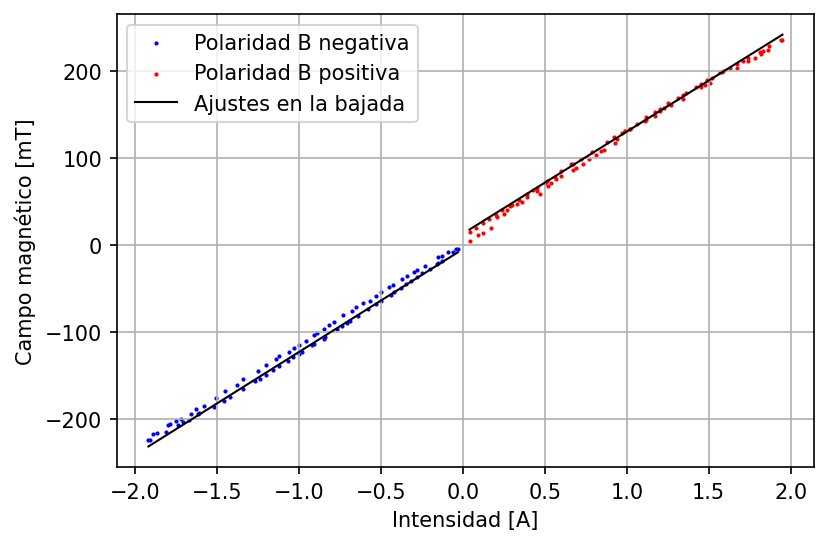

In [32]:
#Tomaremos los datos  correspondientes a las bajadas: 

# Ajuste intensidad +I(A) y campo magnético +B(mT) de la forma B= aI + b:
popt, pcov = curve_fit(histeresis, I_pos_bajada, B_pos_bajada)
perr = np.sqrt(np.diag(pcov))
a_positivo = popt[0]
b_positivo = popt[1]
s_a_positivo = perr[0]
s_b_positivo = perr[1]
# Ajuste intensidad -I(A) y campo magnético -B(mT) de la forma B= aI + b:
popt, pcov = curve_fit(histeresis, I_neg_bajada, B_neg_bajada)
perr = np.sqrt(np.diag(pcov))
a_negativo = popt[0]
b_negativo = popt[1]
s_a_negativo = perr[0]
s_b_negativo = perr[1]

#Realicemos un test Chi^2 y veamos el nivel de confianza para:

#bajada(+B):
i_B_pos = a_positivo * I_pos_bajada + b_positivo
Chi_B_pos = chi2(B_pos_bajada,i_B_pos,s_B)

#bajada(-B):
i_B_neg = a_negativo * I_neg_bajada + b_negativo
Chi_B_neg = chi2(B_neg_bajada,i_B_neg,s_B)

print('----------------------------------------POLARIDAD POSITIVA-----------------------------------------------')
print('pendiente=',a_positivo)
print('error pendiente=',s_a_positivo)
print('termino indep=',b_positivo)
print('error termino indep=',s_b_positivo)
print('----------------------------------------POLARIDAD NEGATIVA-----------------------------------------------')
print('pendiente=',a_negativo)
print('error pendiente=',s_a_negativo)
print('termino indep=',b_negativo)
print('error termino indep=',s_b_negativo)
print('------------------------------------Test Chi POLARIDAD POSITIVA------------------------------------------')
print('Chi^2=',Chi_B_pos)
print('Para 44 grados de libertad y un chi=61.82 nos da que los datos no se ajustan a una recta al 96% de seguridad')
print('------------------------------------Test Chi POLARIDAD NEGATIVA------------------------------------------')
print('Chi^2=',Chi_B_neg)
print('Para 48 grados de libertad y un chi=58.77 nos da que los datos no se ajustan a una recta al 86% de seguridad')
print('---------------------------------------------------------------------------------------------------------')
# Grafiquemos para ver como ajustan:

plt.scatter(I_neg,B_neg,s=1, c='b', label='Polaridad B negativa')
plt.scatter(I_pos,B_pos,s=1, c='r', label='Polaridad B positiva')

plt.plot(I_pos_bajada, histeresis(I_pos_bajada,a_positivo,b_positivo),'black',linewidth=1, label='Ajustes en la bajada')
plt.plot(I_neg_bajada, histeresis(I_neg_bajada,a_negativo,b_negativo),'black',linewidth=1)



plt.xlabel('Intensidad [A]')
plt.ylabel('Campo magnético [mT]')
plt.grid()
plt.legend()
plt.savefig('histeresis.pdf')
plt.show()

In [33]:
#Calculo la tasa de radiación de fondo(R_f) y su incertidubre (s_R_f):

#La incertidumbre del número de cuentas para la radiacion de fondo viene dada por:
s_N_f = error_cuentas(N_f)


R_f = tasa_desintegracion(N_f,T_f)

s_R_f = error_tasa_desintegracion(N_f,T_f,s_N_f,s_T)
print('-------------------------------------------------------------------RADIACION DE FONDO----------------')
print('R_f=', R_f)
print('s_R_f=', s_R_f)
print('-----------------------------------------------------------------------------------------------------')

################################################################################################

#Caracterizaremos ahora el tiempo muerto del detector:


#Incertidumbres asociadas a N_cc, N_cd y N_ci:
s_N_cc = error_cuentas(N_cc)
s_N_cd = error_cuentas(N_cd)
s_N_ci = error_cuentas(N_ci)


#Tasas junto con sus incertidumbres  asociadas a N_cc, N_cd y N_ci:
R_cc = tasa_desintegracion(N_cc,T_cc)
s_R_cc = error_tasa_desintegracion(N_cc,T_cc,s_N_cc,s_T)
print('R_cc=', R_cc)
print('s_R_cc=', s_R_cc)

R_cd = tasa_desintegracion(N_cd,T_cd)
s_R_cd = error_tasa_desintegracion(N_cd,T_cd,s_N_cd,s_T)
print('R_cd=', R_cd)
print('s_R_cd=', s_R_cd)

R_ci = tasa_desintegracion(N_ci,T_ci)
s_R_ci = error_tasa_desintegracion(N_ci,T_ci,s_N_ci,s_T)
print('R_ci=', R_ci)
print('s_R_ci=', s_R_ci)


#Corrijo las tasas con la tasa de radiación de fondo:

R_cc_corregida = tasa_corregida(R_cc,R_f)
s_R_cc_corregida =error_tasa_corregida(R_cc,R_f,s_R_cc,s_R_f)
print('R_cc_corregida=', R_cc_corregida)
print('s_R_cc_corregida=', s_R_cc_corregida)

R_cd_corregida = tasa_corregida(R_cd,R_f)
s_R_cd_corregida =error_tasa_corregida(R_cd,R_f,s_R_cd,s_R_f)
print('R_cd_corregida=', R_cd_corregida)
print('s_R_cd_corregida=', s_R_cd_corregida)

R_ci_corregida = tasa_corregida(R_ci,R_f)
s_R_ci_corregida =error_tasa_corregida(R_ci,R_f,s_R_ci,s_R_f)
print('R_ci_corregida=', R_ci_corregida)
print('s_R_ci_corregida=', s_R_ci_corregida)


#Por tanto el TIEMPO MUERTO:

t = tiempo_muerto(R_cd_corregida,R_ci_corregida,R_cc_corregida)
s_t = error_tiempo_muerto(R_cd_corregida,R_ci_corregida,R_cc_corregida,s_R_cd_corregida,s_R_ci_corregida,s_R_cc_corregida)
print('t=', t)
print('s_t=', s_t)

print('t[micros]=', t*1e6)

#Realizo una media ponderada:

w_i = w_i(s_t)
tiempo_muerto = media_ponderada(t,w_i)
s_tiempo_muerto = s_media_ponderada(w_i)

print('--------------------------------------------------------------TIEMPO MUERTO------------------------')
print('Media tiempo muerto=', tiempo_muerto)
print('Desviación media =', s_tiempo_muerto)
print('EN MICROSEGUNDOS')
print('Media tiempo muerto=', tiempo_muerto*1e6)
print('Desviación media =', s_tiempo_muerto*1e6)
print('---------------------------------------------------------------------------------------------------')

-------------------------------------------------------------------RADIACION DE FONDO----------------
R_f= 0.3721002560271911
s_R_f= 0.014375546456059766
-----------------------------------------------------------------------------------------------------
R_cc= [316.2 303.8 305.4 301.2 306.1]
s_R_cc= [8.46244504 8.20352217 8.23696935 8.14914572 8.25159888]
R_cd= [147.36666667 149.53333333 147.4        146.93333333 146.48333333]
s_R_cd= [1.64237949 1.65549663 1.64258184 1.63974729 1.63701071]
R_ci= [186.5 191.  194.5 188.6 183.1]
s_R_ci= [5.70639115 5.80451548 5.88065473 5.75221557 5.6320728 ]
R_cc_corregida= [315.82789974 303.42789974 305.02789974 300.82789974 305.72789974]
s_R_cc_corregida= [8.46245725 8.20353477 8.23698189 8.1491584  8.2516114 ]
R_cd_corregida= [146.99456641 149.16123308 147.02789974 146.56123308 146.11123308]
s_R_cd_corregida= [1.6424424  1.65555904 1.64264475 1.6398103  1.63707383]
R_ci_corregida= [186.12789974 190.62789974 194.12789974 188.22789974 182.72789974]
s

In [34]:
#Pasemos ahora al cálculo de las tasas reales en cada uno de los elementos radiactivos:



##############################            ESTRONCIO          ########################################
A_0_Sr = 40700
T_vm_Sr = 28.2
intervalo_Sr = 38.00
s_intervalo_Sr = 0.25

A_Sr = actividad(A_0_Sr,intervalo_Sr,T_vm_Sr)
s_A_Sr = error_actividad(A_0_Sr,intervalo_Sr,T_vm_Sr,s_intervalo_Sr)
##############################             KRYPTON           ########################################



#Actividad e incertidumbre de la muestra:
A_Kr = actividad(A_0_Kr,intervalo_Kr,T_vm_Kr)
s_A_Kr = error_actividad(A_0_Kr,intervalo_Kr,T_vm_Kr,s_intervalo_Kr)

#Incertidumbres asociada a N_kr:
s_N_kr = error_cuentas(N_kr)

#Tasa junto con su incertidumbre  asociada a Kr:
R_kr = tasa_desintegracion(N_kr,t_kr)
s_R_kr = error_tasa_desintegracion(N_kr,t_kr,s_N_kr,s_T)

#Corrijo la tasa con la tasa de radiación de fondo:
R_kr_corregida = tasa_corregida(R_kr,R_f)
s_R_kr_corregida =error_tasa_corregida(R_kr,R_f,s_R_kr,s_R_f)

#Obtengo la tasa real asociada a Kr:
R_kr_real = tasa_real(R_kr_corregida,tiempo_muerto)
s_R_kr_real = error_tasa_real(R_kr_corregida,tiempo_muerto,s_R_kr_corregida,s_tiempo_muerto)

#Calcularemos ahora las energías cinéticas y momentos para el Krypton a partir del campo magnético
T_kr = energia_cinetica(mB_kr,r,m)
s_T_kr = error_energia_cinetica(mB_kr,r,m,s_B)

p_kr = momento_lineal(mB_kr,r)
s_p_kr = error_momento_lineal(r,s_B)

F_kr = Fermi(36,85,p_kr,-1)

s_Kr = np.sqrt((p_kr)**2 + ((0.687e6 - T_kr)/3e8)**2)

FK_kr = Fermi_Kurie(R_kr_real,p_kr,F_kr,s_Kr)
FK_kr_S_1 = Fermi_Kurie(R_kr_real,p_kr,F_kr,1)


##############################               RADIO          ########################################


#Actividad e incertidumbre de la muestra:
A_Ra = actividad(A_0_Ra,intervalo_Ra,T_vm_Ra)
s_A_Ra = error_actividad(A_0_Ra,intervalo_Ra,T_vm_Ra,s_intervalo_Ra)


#Incertidumbres asociada a N_ra:
s_N_ra = error_cuentas(N_ra)

#Tasa junto con su incertidumbre  asociada a Ra:
R_ra = tasa_desintegracion(N_ra,t_ra)
s_R_ra = error_tasa_desintegracion(N_ra,t_ra,s_N_ra,s_T)

#Corrijo la tasa con la tasa de radiación de fondo:
R_ra_corregida = tasa_corregida(R_ra,R_f)
s_R_ra_corregida =error_tasa_corregida(R_ra,R_f,s_R_ra,s_R_f)

#Obtengo la tasa real asociada a Ra:
R_ra_real = tasa_real(R_ra_corregida,tiempo_muerto)
s_R_ra_real = error_tasa_real(R_ra_corregida,tiempo_muerto,s_R_ra_corregida,s_tiempo_muerto)

#Calcularemos ahora la energía cinética y momento para el Radio a partir del campo magnético
T_ra = energia_cinetica(mB_ra,r,m)
s_T_ra = error_energia_cinetica(mB_ra,r,m,s_B)

p_ra = momento_lineal(mB_ra,r)
s_p_ra = error_momento_lineal(r,s_B)



##############################              SODIO           ########################################


#Actividad e incertidumbre de la muestra:
A_Na = actividad(A_0_Na,intervalo_Na,T_vm_Na)
s_A_Na = error_actividad(A_0_Na,intervalo_Na,T_vm_Na,s_intervalo_Na)


#Incertidumbres asociada a N_na:
s_N_na = error_cuentas(N_na)

#Tasa junto con su incertidumbre  asociada a Na:
R_na = tasa_desintegracion(N_na,t_na)
s_R_na = error_tasa_desintegracion(N_na,t_na,s_N_na,s_T)

#Corrijo la tasa con la tasa de radiación de fondo:
R_na_corregida = tasa_corregida(R_na,R_f)
s_R_na_corregida =error_tasa_corregida(R_na,R_f,s_R_na,s_R_f)

#Obtengo la tasa real asociada a Na:
R_na_real = tasa_real(R_na_corregida,tiempo_muerto)
s_R_na_real = error_tasa_real(R_na_corregida,tiempo_muerto,s_R_na_corregida,s_tiempo_muerto)

#Calcularemos ahora la energía cinética y momento para el Sodio a partir del campo magnético
T_na = energia_cinetica(mB_na,r,m)
s_T_na = error_energia_cinetica(mB_na,r,m,s_B)

p_na = momento_lineal(mB_na,r)
s_p_na = error_momento_lineal(r,s_B)

F_na = Fermi(11,22,p_na,-1)
FK_na = Fermi_Kurie(R_na_real,p_na,F_na,1)


####################################################################################################



print('---------------------------------------------------------------------------------------------------')
print('Actividad Kripton=', A_Kr)
print('Error actividad Kripton=', s_A_Kr)
print('-----------------------------------')
print('Actividad Radio=', A_Ra)
print('Error actividad Radio=', s_A_Ra)
print('-----------------------------------')
print('Actividad Sodio=', A_Na)
print('Error actividad Sodio=', s_A_Na)
print('-----------------------------------')
print('Actividad Estroncio=', A_Sr)
print('Error actividad Estroncio=', s_A_Sr)
print('-----------------------------------')



print('---------------------------------------------------------------------------------------------------')






---------------------------------------------------------------------------------------------------
Actividad Kripton= 12719.942797355201
Error actividad Kripton= 204.8511265536836
-----------------------------------
Actividad Radio= 3273.303051525377
Error actividad Radio= 0.35451262207548134
-----------------------------------
Actividad Sodio= 53311.558111514154
Error actividad Sodio= 1179.645678572715
-----------------------------------
Actividad Estroncio= 15993.781281797324
Error actividad Estroncio= 98.28053547845961
-----------------------------------
---------------------------------------------------------------------------------------------------


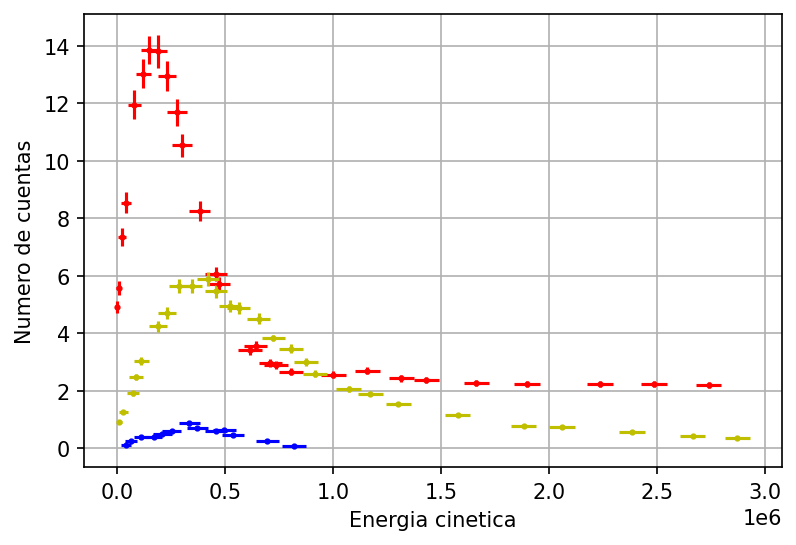

In [35]:
#ploteamos tasa de cuentas real frente a T

plt.errorbar(T_na,R_na_real, yerr=s_R_na_real, xerr=s_T_na, ms=2, c='r', fmt='o')
plt.errorbar(T_ra,R_ra_real, yerr=s_R_ra_real, xerr=s_T_ra, ms=2, c='y', fmt='o')
plt.errorbar(T_kr,R_kr_real, yerr=s_R_kr_real, xerr=s_T_kr, ms=2, c='b', fmt='o')
plt.xlabel('Energia cinetica')
plt.ylabel('Numero de cuentas')
plt.grid()
plt.show()

### Vamos a representar a continuación los diagramas de Fermi-Curie para el Sodio y el Kripton, ajustando a una recta cuya intersección con el eje X sea el Q-value de la desintegración

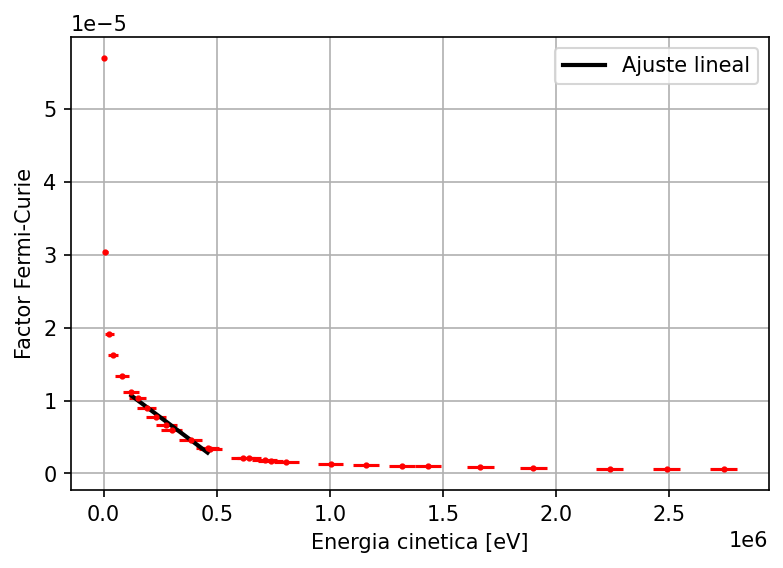

Q_value_na = 0.5823902496007879 [MeV] -->s(Q_value_na)= 0.022904287327660342 [MeV]


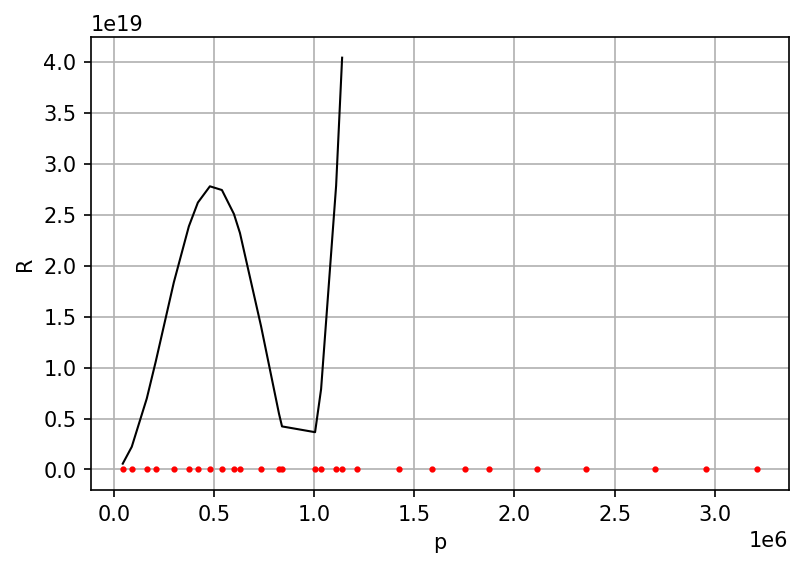

Q_value_na = 0.5533334558739642 [MeV] -->s(Q_value_na)= 0.028084882062434813 [MeV]
0.0003110936291246839


In [166]:
##############################              SODIO           ########################################

#Puesto que la desintegración más probable del Sodio es permitida el Shape factor S=1 quedandonos:

plt.errorbar(T_na,FK_na, yerr=None, xerr=s_T_na, ms=2, c='r', fmt='o')
plt.plot(T_na_lineal, ajuste_fermi_kurie(T_na_lineal, *parametros_na), c='black', linewidth= 2, label='Ajuste lineal')

plt.xlabel('Energia cinetica [eV]')
plt.ylabel('Factor Fermi-Curie')
plt.grid()
plt.legend()
plt.savefig('FKna')
plt.show()

#Vamos a tomar los valores a partir de 80 [KeV] ya que a bajas energías nos alejamos de la linealidad y acotamos por debajo de 500 [KeV]

#print(T_na)
#print(FK_na)


#a partir de 80 [keV]
T_na_lineal_1=(T_na>=8.15547765e+04)
FK_na_lineal_1=(FK_na<=1.34235957e-05)


T_na_lineal_2=T_na[T_na_lineal_1]
FK_na_lineal_2=FK_na[FK_na_lineal_1]

################################################

#por debajo de 500 [keV]
T_na_lineal_3=(T_na_lineal_2<4.72220191e+05)
FK_na_lineal_3=(FK_na_lineal_2>3.32932623e-06)


T_na_lineal=T_na_lineal_2[T_na_lineal_3]
FK_na_lineal=FK_na_lineal_2[FK_na_lineal_3]
R_na_fermi=R_na_real[0:18]
F_na_fermi=F_na[0:18]
p_na_fermi=p_na[0:18]
T_na_fermi=T_na[0:18]
################################################################################################



#ajusto a la función definida 

popt, pcov = curve_fit(ajuste_fermi_kurie, T_na_lineal, FK_na_lineal)
perr = np.sqrt(np.diag(pcov))
Q_value_na = popt[0]
s_Q_value_na = perr[0]
a = popt[1]
parametros_na = [Q_value_na, a]
print('Q_value_na =',Q_value_na/1e6, '[MeV]','-->s(Q_value_na)=', s_Q_value_na/1e6,'[MeV]')
################################################################################################




popt,pcov = curve_fit(ajuste_cuadratico_fermi,p_na_fermi,R_na_fermi,p0 = [100, 10000],bounds=(0, 2e6))
perr = np.sqrt(np.diag(pcov))

a_F = popt[0]#a
s_a_F = perr[0]
Q_value_na_F = popt[1]#b
s_Q_value_na_F = perr[1]
parametros_fermi_na = [a_F,Q_value_na_F]



plt.errorbar(p_na,R_na_real, yerr=None, xerr=None, ms=2, c='r', fmt='o')


plt.plot(p_na_fermi, ajuste_cuadratico_fermi(p_na_fermi, *parametros_fermi_na), c='black', linewidth= 1, label='Ajuste funcion Fermi')
plt.xlabel('p')
plt.ylabel('R')
plt.grid()
plt.show()


print('Q_value_na =',Q_value_na_F/1e6, '[MeV]','-->s(Q_value_na)=', s_Q_value_na_F/1e6,'[MeV]')
print(s_a_F)

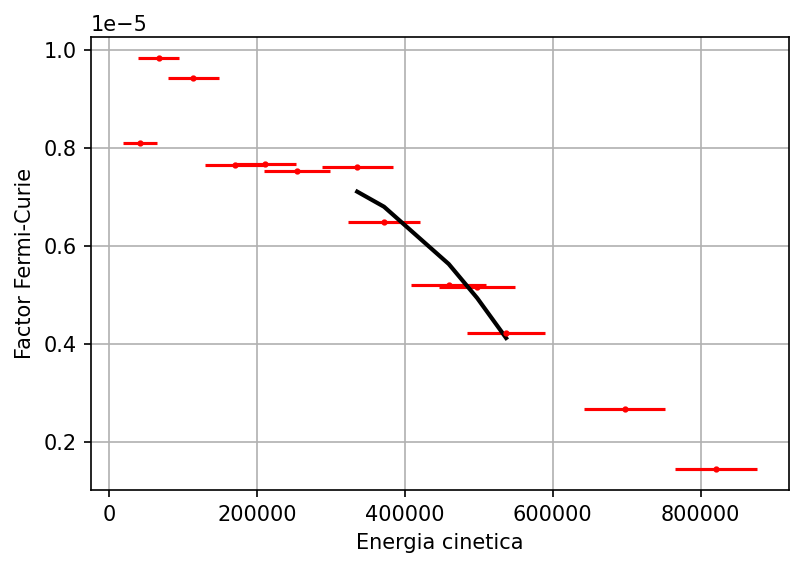

[335608.92460324 371905.28586625 459436.45792649 497970.76069702
 537020.55039064]
[7.53001825e-06 6.48539980e-06 5.21325452e-06 5.15369162e-06
 4.23022667e-06]


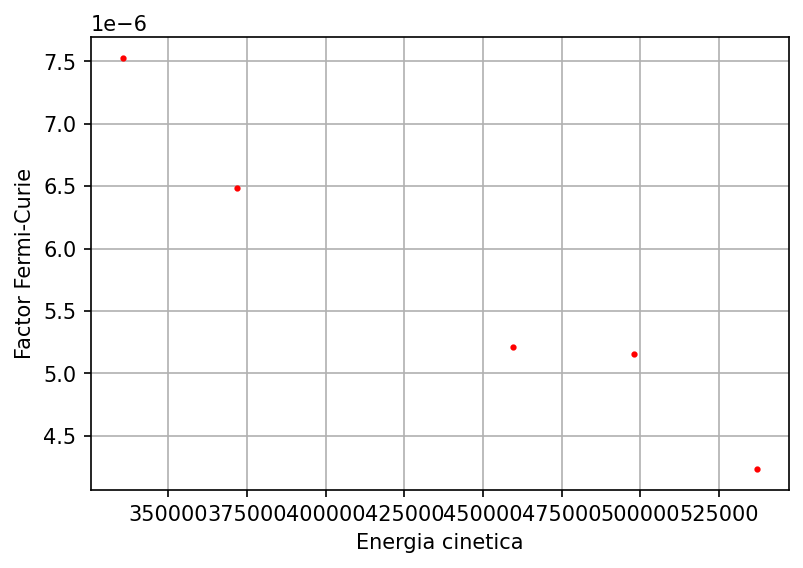

Q-value 0.6874267529618682 MeV -->s(Q)= 0.025459267976735374


In [164]:
##############################             KRYPTON           ########################################

#Puesto que la desintegración más probable del Kripton es prohibida de primer orden el Shape factor S= p + q quedandonos:

plt.errorbar(T_kr,FK_kr_S_1, yerr=None, xerr=s_T_kr, ms=2, c='r', fmt='o')
plt.plot(T_kr_lineal, ajuste_fermi_kurie_kr(T_kr_lineal, *parametros_kr), c='black', linewidth= 2, label='Ajuste lineal')
plt.xlabel('Energia cinetica')
plt.ylabel('Factor Fermi-Curie')
plt.grid()
plt.savefig('FKkr')
plt.show()

#Vamos a tomar los valores a partir de 250 [KeV] ya que a bajas energías nos alejamos de la linealidad y acotamos por debajo de 697 [KeV]

#print(T_kr)
#print(FK_kr_S_1)
#print(p_kr)

#a partir de 0.5 [MeV]
T_kr_lineal_1=(T_kr>254520.41712866)
FK_kr_lineal_1=(FK_kr_S_1<=7.60987101e-06)
p_kr_lineal_1=(p_kr>57e4)



T_kr_lineal_2=T_kr[T_kr_lineal_1]
FK_kr_lineal_2=FK_kr_S_1[FK_kr_lineal_1]
p_kr_lineal_2=p_kr[p_kr_lineal_1]
################################################

#por debajo de 1 [MeV]
T_kr_lineal_3=(T_kr_lineal_2<697365.58819389)
FK_kr_lineal_3=(FK_kr_lineal_2>=4.23022667e-06)
p_kr_lineal_3=(p_kr_lineal_2<1095e3)


p_kr_lineal = p_kr_lineal_2[p_kr_lineal_3]
T_kr_lineal = T_kr_lineal_2[T_kr_lineal_3]
FK_kr_lineal = FK_kr_lineal_2[FK_kr_lineal_3]
print(T_kr_lineal)
print(FK_kr_lineal)
################################################

plt.errorbar(T_kr_lineal,FK_kr_lineal, yerr=None, xerr=None, ms=2, c='r', fmt='o')
plt.xlabel('Energia cinetica')
plt.ylabel('Factor Fermi-Curie')
plt.grid()
plt.show()

#ajusto a la función definida 
popt, pcov = curve_fit(ajuste_fermi_kurie_kr, T_kr_lineal, FK_kr_lineal)
perr = np.sqrt(np.diag(pcov))
a_F_kr = popt[1]#a
s_a_F_kr = perr[1]
Q_value_kr_F = popt[0]#b
s_Q_value_kr_F = perr[0]
parametros_kr = [Q_value_kr_F,a_F_kr]
print('Q-value',Q_value_kr_F/1e6, 'MeV','-->s(Q)=', s_Q_value_kr_F/1e6)










